<a href="https://colab.research.google.com/github/MuhammadHatta72/machine-learning-semester5/blob/main/meet3/Tugas_Meet03_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Nama : Muhammad Hatta
###Kelas : 3A-TI
###Mata Kuliah : Machine Learning

In [60]:
# import package
import numpy as np
import pandas as pd
# baca data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning-Semester 5/Pratikum3/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [61]:
# Identifikasi variabel bebas (fitur) dan variabel target:
# Ukuran dari data
data.shape

# Info data
data.info()

# Deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


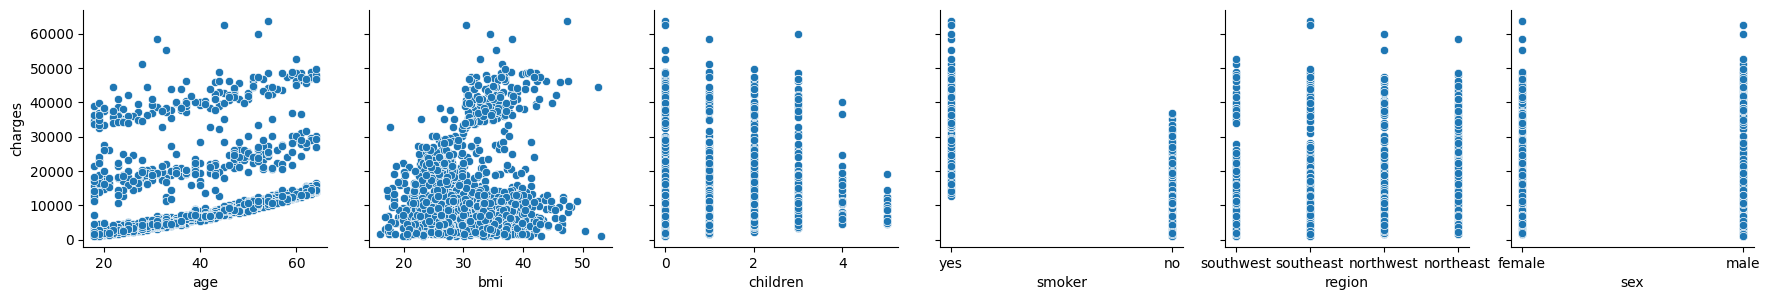

In [62]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
# Operasi visualisasi
sns.pairplot(data, x_vars=['age', 'bmi','children', 'smoker', 'region', 'sex'],
             y_vars='charges', size=3, aspect=1, kind='scatter')
plt.show()

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Memproses data terlebih dahulu, misalnya mengkodekan variabel 'perokok'
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Pilih variabel independen dan variabel target
X = data[['age', 'bmi', 'children', 'smoker']]
y = data['charges']

# Pisahkan data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [64]:
# Membuat dan melatih model regresi linier berganda
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [65]:
# Buatlah prediksi pada set tes
y_pred = model.predict(X_test)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

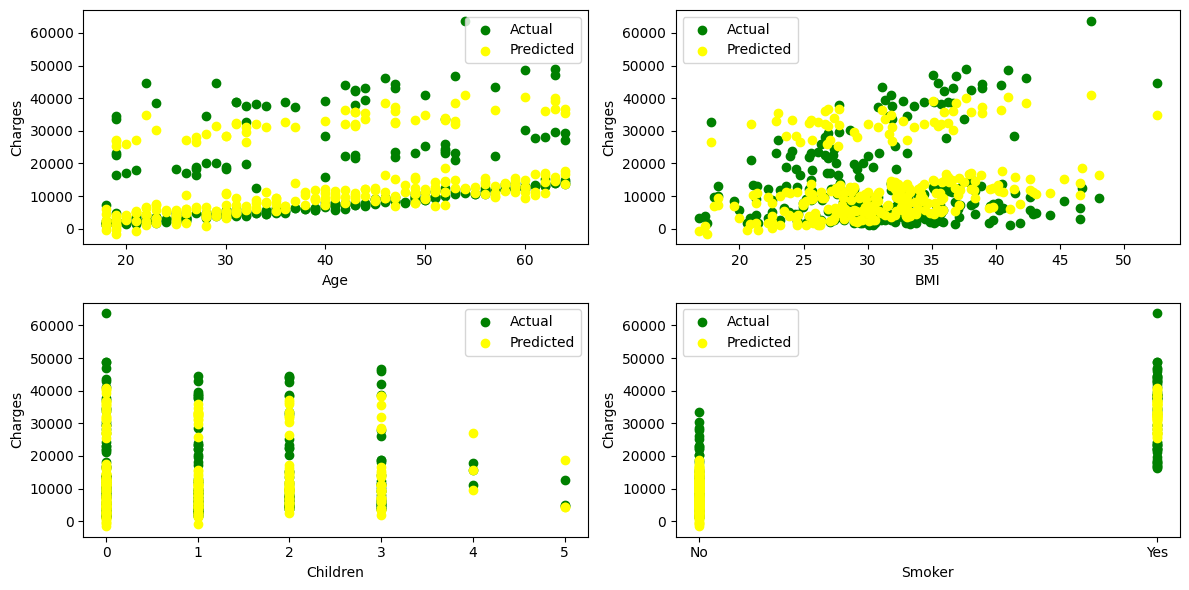

Mean Squared Error (MSE): 33981653.95019776
R-squared: 0.7811147722517886
Mean Absolute Error (MAE): 4213.798594527248


In [66]:
# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Sebar plot untuk 'usia' vs. 'biaya'
plt.subplot(2, 2, 1)
plt.scatter(X_test['age'], y_test, color='green', label='Actual')
plt.scatter(X_test['age'], y_pred, color='yellow', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'bmi' vs. 'biaya'
plt.subplot(2, 2, 2)
plt.scatter(X_test['bmi'], y_test, color='green', label='Actual')
plt.scatter(X_test['bmi'], y_pred, color='yellow', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'children' vs. 'charges'
plt.subplot(2, 2, 3)
plt.scatter(X_test['children'], y_test, color='green', label='Actual')
plt.scatter(X_test['children'], y_pred, color='yellow', label='Predicted')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'smoker' vs. 'charges'
plt.subplot(2, 2, 4)
plt.scatter(X_test['smoker'], y_test, color='green', label='Actual')
plt.scatter(X_test['smoker'], y_pred, color='yellow', label='Predicted')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()

# Tampilkan semua plot
plt.tight_layout()
plt.show()
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")